*by Pablo Yuri*

[*github.com/pyurips*](https://github.com/pyurips)

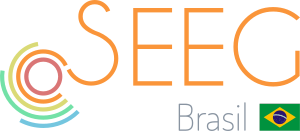

O [Sistema de Estimativas de Emissões e Remoções de Gases de Efeito Estufa](https://seeg.eco.br/) (**SEEG**) é uma iniciativa do Observatório do Clima que compreende a produção de estimativas anuais das emissões de gases de efeito estufa (**GEE**) no Brasil, documentos analíticos sobre a evolução das emissões e um portal na internet para disponibilização de forma simples e clara dos métodos e dados do sistema.

São avaliados todos os cinco setores que são fontes de emissões – Agropecuária, Energia, Mudanças de Uso da Terra, Processos Industriais e Resíduos com o mesmo grau de detalhamento contido nos inventários de emissões.



**A fonte do texto e dos dados serão encontradas** [neste link](https://basedosdados.org/dataset/br-seeg-emissoes).

---


Abaixo será realizada a *análise e a limpeza dos dados*, objetivando uma visualização clara dos dados por gráficos e a obtenção de insights relacionados as emissões de gases de efeito estufa no território brasileiro.

### **Obtenção dos dados e a importação dos módulos necessários**


---



In [1]:
import numpy as np # biblioteca para manipulação de matrizes e relacionados https://numpy.org/ #
import pandas # biblioteca para manipulação e análise de dados https://pandas.pydata.org/ #
import matplotlib.pyplot as mpl # biblioteca para visualização de gráficos https://matplotlib.org/ #
import seaborn # biblioteca para visualização de gráficos baseada na matplotlib https://seaborn.pydata.org/ #
import plotly.express as px # biblioteca de gráficos e mapas interativos https://plotly.com/ #
pandas.options.plotting.backend = "plotly"

dataset = pandas.read_csv("dataset_SEEG.csv") # atribuição da variável "dataset" com o objeto do tipo "DataFrame"

### **Análise geral dos dados**


---



Primeiramente, faz-se necessário entender como os dados estão organizados, quais são as colunas que estão envolvidas no conjunto e o significado e a relevância de cada uma dessas.

Portanto, analisaremos as dez primeiras entradas do conjunto de dados.

In [2]:
dataset.head(10)

,ano,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,tipo_emissao,gas,atividade_economica,produto,emissao
0,1970,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,230462.17
1,1971,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,226016.30
2,1972,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,220101.20
3,1973,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,214195.56
4,1974,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,186862.84
5,1975,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,197538.20
6,1976,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,231922.02
7,1977,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,209517.92
8,1978,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,174633.98
9,1979,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,162579.47


Observando as primeiras entradas e suas colunas, percebemos que do *`nivel_1`* até *`nivel_6`*, a especificidade da entidade que polui é diretamente proporcional ao nível. Deste modo, trabalharemos primeiramente com níveis que englobam dados mais gerais, como o *`nivel_1`* e o *`nivel_2`*. Depois, com colunas mais específicas, como *`nivel_6`*. Como o dataset dá os anos que foram registradas as emissões, analisaremos também por esse. Outra coluna que usaremos será a *`gas`*, que diz respeito a substância química que foi emitida.

---

In [3]:
print(f'Quantidade de linhas: {dataset.shape[0]}\nQuantidade de colunas: {dataset.shape[1]}', end='\n\n')

Quantidade de linhas: 454850
Quantidade de colunas: 12



In [4]:
print(f'Tipo das variáveis em cada coluna: \n')
dataset.dtypes

Tipo das variáveis em cada coluna: 



ano                      int64
nivel_1                 object
nivel_2                 object
nivel_3                 object
nivel_4                 object
nivel_5                 object
nivel_6                 object
tipo_emissao            object
gas                     object
atividade_economica     object
produto                 object
emissao                float64
dtype: object

---

Neste dataset, só existem duas colunas com dados numéricos: *`anos`* e *`emissao`*. 
O objetivo no código abaixo é analisar a média, quantidade, desvio padrão etc. Logo, por enquanto, a coluna *`anos`* não será necessária para essa análise no momento.

In [5]:
print(f'Descrição dos valores somente da coluna EMISSAO:')
dataset.emissao.describe()

Descrição dos valores somente da coluna EMISSAO:


count    4.063250e+05
mean     1.437622e+06
std      3.124689e+07
min     -3.107000e+08
25%      0.000000e+00
50%      4.689636e+00
75%      4.525840e+04
max      2.083000e+09
Name: emissao, dtype: float64

Por enquanto, as duas informações mais importantes retiradas do método *`describe()`* é o valor mínimo (nós começamos a perceber que existem dados de emissões com valores negativos, o qual analisaremos o seu significado durante a análise) e o valor máximo, ambos podendo indicar a presença de outliers, visto que a ordem de grandeza entre ambos é muito distante, relacionando-os com o primeiro e terceiro quartil.

---

Agora realizaremos uma análise da coluna *`ano`*, pois há dezenas de milhares de entradas com inúmeros anos diferentes. O objetivo será entender como os mesmos estão distribuido pelo dataset.

In [6]:
print(f'Descrição dos valores somente da coluna ANO:')
dataset.ano.describe()

Descrição dos valores somente da coluna ANO:


count    454850.000000
mean       1994.500000
std          14.430886
min        1970.000000
25%        1982.000000
50%        1994.500000
75%        2007.000000
max        2019.000000
Name: ano, dtype: float64

Somente pela função *`describe()`* não é possível ter uma ideia muito clara de como estão distribuidos os dados. Portanto, o próximo passo é visualizar a distribuição das entradas numéricas no dataset. Mas, é possível retirar a informação que as emissões de gases neste conjunto de dados estão sendo auferidos desde 1970 (valor mínimo) até 2019 (valor máximo).


In [7]:
dataset.ano.value_counts().sort_index(ascending=True)

1970    9097
1971    9097
1972    9097
1973    9097
1974    9097
1975    9097
1976    9097
1977    9097
1978    9097
1979    9097
1980    9097
1981    9097
1982    9097
1983    9097
1984    9097
1985    9097
1986    9097
1987    9097
1988    9097
1989    9097
1990    9097
1991    9097
1992    9097
1993    9097
1994    9097
1995    9097
1996    9097
1997    9097
1998    9097
1999    9097
2000    9097
2001    9097
2002    9097
2003    9097
2004    9097
2005    9097
2006    9097
2007    9097
2008    9097
2009    9097
2010    9097
2011    9097
2012    9097
2013    9097
2014    9097
2015    9097
2016    9097
2017    9097
2018    9097
2019    9097
Name: ano, dtype: int64

Finalmente, verificando a frequência de cada variável da coluna *`ano`*, constatamos que, em cada ano, foram coletados 9097 dados sobre emissões de gases poluentes, ainda não considerando os valores nulos.

---

Nos códigos abaixo, serão realizadas análises das variáveis categórias que serão relevantes para esta análise de dados.

In [8]:
print(f'Valores que aparecem na coluna NIVEL_1: \n')
dataset.nivel_1.unique()

Valores que aparecem na coluna NIVEL_1: 



array(['Agropecuária', 'Energia', 'Mudança de Uso da Terra e Floresta',
       'Processos Industriais', 'Resíduos '], dtype=object)

In [9]:
print(f'Valores que aparecem na coluna NIVEL_2: \n')
dataset.nivel_2.unique()

Valores que aparecem na coluna NIVEL_2: 



array(['Cultivo do Arroz', 'Fermentação Entérica',
       'Manejo de Dejetos Animais', 'Queima de Resíduos Agrícolas',
       'Solos Manejados', 'Emissões Fugitivas',
       'Emissões pela Queima de Combustíveis',
       'Alterações de Uso do Solo', 'Remoção em Áreas Protegidas',
       'Remoção por Mudança de Uso da Terra',
       'Remoção por Vegetação Secundária', 'Resíduos Florestais',
       'Emissões de HFCs', 'Indústria Química', 'Produtos Minerais',
       'Produção de Metais',
       'Uso Não-Energético de Combustíveis e Uso de Solventes',
       'Uso de SF6', 'Efluentes Liquidos', 'Resíduos Sólidos'],
      dtype=object)

In [10]:
print(f'Valores que aparecem na coluna NIVEL_3: \n')
dataset.nivel_3.unique()

Valores que aparecem na coluna NIVEL_3: 



array(['Diretas', 'Indiretas', 'Produção de Combustíveis', 'Agropecuário',
       'Comercial', 'Geração de Eletricidade (Serviço Público)',
       'Industrial', 'Não Identificado', 'Público', 'Residencial',
       'Transportes', 'Amazônia', 'Caatinga', 'Cerrado', 'Mata Atlântica',
       'Pampa', 'Pantanal', 'NÃO SE APLICA', 'Produção de ABS',
       'Produção de Acrilonitrila', 'Produção de Amônia',
       'Produção de Anidrido Ftálico',
       'Produção de Borracha de butadieno estireno (SBR)',
       'Produção de Caprolactama', 'Produção de Carbureto de Cálcio',
       'Produção de Cloreto de Vinila',
       'Produção de Coque de Petróleo Calcinado',
       'Produção de Dicloroetano', 'Produção de Estireno',
       'Produção de Eteno', 'Produção de Etilbenzeno',
       'Produção de Formaldeído', 'Produção de Metanol',
       'Produção de Negro-de-fumo', 'Produção de PVC',
       'Produção de Poliestireno', 'Produção de Polietileno PEAD',
       'Produção de Polietileno PEBD', 'Produ

In [11]:
print(f'Valores que aparecem na coluna NIVEL_4: \n')
dataset.nivel_4.unique()

Valores que aparecem na coluna NIVEL_4: 



array(['Outros', 'Aplicação de resíduos orgânicos',
       'Deposição de dejetos em pastagem', 'Fertilizantes Sintéticos',
       'Mineralização de N associado a perda de C no solo',
       'Resíduos Agrícolas', 'Solos orgânicos',
       'Variação dos Estoques de Carbono no Solo',
       'Deposição Atmosférica', 'Lixiviação',
       'Exploração de petróleo e gás natural',
       'Produção de carvão mineral e outros', 'Refino de petróleo',
       'Transporte de gás natural', 'NÃO SE APLICA',
       'Alimentos e bebidas', 'Cerâmica', 'Cimento', 'Ferro Ligas',
       'Ferro gusa e aço', 'Mineração e pelotização',
       'Não ferrosos e outros da metalurgia', 'Outras indústrias',
       'Papel e celulose', 'Química', 'Têxtil',
       'Produção de carvão vegetal', 'Produção de álcool', 'Aéreo',
       'Ferroviário', 'Hidroviário', 'Rodoviário', 'em Área Protegida',
       'fora de Área Protegida', 'Cal Calcítica', 'Cal Dolomítica',
       'Cal Magnesiana', 'Consumo de Calcário', 'Consumo de

In [12]:
print(f'Valores que aparecem na coluna NIVEL_5: \n')
dataset.nivel_5.unique()

Valores que aparecem na coluna NIVEL_5: 



array(['Vegetal', 'Animal', 'Outros', 'Petróleo e gás natural',
       'Carvão mineral', 'Petróleo', 'Gás natural', 'Bagaço de cana',
       'Biogás', 'Carvão vegetal', 'Diesel de petróleo', 'GLP',
       'Gás de refinaria', 'Gás natural seco', 'Lenha',
       'Outras biomassas', 'Querosene iluminante', 'Álcool hidratado',
       'Óleo combustível', 'Óleo diesel', 'Coque de petróleo',
       'Gás canalizado RJ', 'Gás canalizado SP', 'Alcatrão',
       'Carvão vapor 3100', 'Carvão vapor 3300', 'Carvão vapor 4200',
       'Carvão vapor 4500', 'Carvão vapor 4700', 'Carvão vapor 5200',
       'Carvão vapor 6000', 'Gás natural úmido',
       'Outros energéticos de petróleo', 'Carvão vapor 3700',
       'Carvão vapor 5900', 'Carvão vapor sem especificação',
       'Outras não renováveis', 'Coque de carvão mineral',
       'Gás de coqueria', 'Nafta', 'Lixívia', 'Lenha carvoejamento',
       'Gasolina de aviação', 'Querosene de aviação', 'Gasolina C',
       'Gasolina automotiva', 'Desmatament

In [13]:
print(f'Valores que aparecem na coluna NIVEL_6: \n')
dataset.nivel_6.unique()

Valores que aparecem na coluna NIVEL_6: 



array(['Arroz', 'Asinino', 'Bubalino', 'Caprino', 'Equino',
       'Gado de Corte', 'Gado de Leite', 'Muar', 'Ovino', 'Suínos',
       'Aves', 'Algodão', 'Cana de Açucar', 'Torta de Filtro', 'Vinhaça',
       'Fertilizantes Sintéticos', 'Outros', 'Aplicação de Ureia',
       'Uso de Calcário', 'Feijão', 'Mandioca', 'Milho',
       'Outras Culturas', 'Pastagem', 'Soja', 'Trigo', 'Solos orgânicos',
       'Florestas Plantadas',
       'Lavouras Cultivadas sob Sistema Convencional',
       'Lavouras Cultivadas sob Sistema Plantio Direto',
       'Pastagem Bem Manejada', 'Pastagem Degradada',
       'Sistemas Integrados Lavoura-Pecuária-Floresta', 'NÃO SE APLICA',
       'Centrais Elétricas Autoprodutoras', 'Consumo Final Energético',
       'Centrais Elétricas de Serviço Público', 'Carvoarias', 'Aeronaves',
       'Locomotivas', 'Embarcações', 'Automóveis', 'Caminhões',
       'Comerciais Leves', 'Ônibus', 'Motocicletas',
       'Floresta primária -- Silvicultura',
       'Floresta primár

In [14]:
print(f'Valores que aparecem na coluna TIPO_EMISSAO: \n')
dataset.tipo_emissao.unique()

Valores que aparecem na coluna TIPO_EMISSAO: 



array(['Emissão', 'Remoção NCI', 'Emissão NCI', 'Bunker', 'Emissão proxy',
       'Remoção proxy', 'Remoção'], dtype=object)

In [15]:
print(f'Valores que aparecem na coluna GAS: \n')
dataset.gas.unique()

Valores que aparecem na coluna GAS: 



array(['CH4 (t)', 'CO2e (t) GTP-AR2', 'CO2e (t) GTP-AR4',
       'CO2e (t) GTP-AR5', 'CO2e (t) GWP-AR2', 'CO2e (t) GWP-AR4',
       'CO2e (t) GWP-AR5', 'N2O (t)', 'CO (t)', 'NOX (t)', 'CO2 (t)',
       'COVNM (t)', 'NOx (t)', 'HFC-125 (t)', 'HFC-134a (t)',
       'HFC-143a (t)', 'HFC-152a (t)', 'HFC-23 (t)', 'HFC-32 (t)',
       'C2F6 (t)', 'CF4 (t)', 'SF6 (t)'], dtype=object)

In [16]:
print(f'Valores que aparecem na coluna ATIVIDADE_ECONOMICA: \n')
dataset.atividade_economica.unique()

Valores que aparecem na coluna ATIVIDADE_ECONOMICA: 



array([nan, 'PEC', 'AGR', 'PROD_COMB', 'ENE_ELET', 'AGROPEC', 'COM',
       'Outra_IND', 'CIM', 'MET', 'OUTra_IND', 'PUB', 'RES', 'TRAN_PASS',
       'TRAN_CARGA', 'Conservação', 'HFC', 'SANEAMENTO'], dtype=object)

In [17]:
print(f'Valores que aparecem na coluna PRODUTO: \n')
dataset.produto.unique()

Valores que aparecem na coluna PRODUTO: 



array([nan, 'CAR', 'LEI', 'ALIM_BEBIDAS', 'CAR/LEI/ALIM_BEBIDAS',
       'ENE_ELET', 'ACO', 'ALU', 'NÃO SE APLICA'], dtype=object)

Nesta análise exploratória, usaremos somente as colunas categóricas  *`nivel_1`*, *`nivel_2`*, *`nivel_6`* e *`gas`*. Todas elas consideradas nominais por não apresentarem uma ordem dentre as categorias.

Já com as colunas escolhidas, é fundamental saber a frequência das entradas relacionadas as essas colunas.

In [18]:
dataset.nivel_1.value_counts() / dataset.shape[0] * 100

Energia                               59.030450
Mudança de Uso da Terra e Floresta    28.371991
Agropecuária                           7.189183
Processos Industriais                  4.122238
Resíduos                               1.286138
Name: nivel_1, dtype: float64

In [19]:
dataset.nivel_2.value_counts() / dataset.shape[0] * 100

Emissões pela Queima de Combustíveis                     58.645707
Alterações de Uso do Solo                                16.543916
Solos Manejados                                           5.386391
Remoção por Mudança de Uso da Terra                       5.386391
Remoção por Vegetação Secundária                          4.001319
Produção de Metais                                        1.956689
Remoção em Áreas Protegidas                               1.385072
Indústria Química                                         1.297131
Resíduos Florestais                                       1.055293
Manejo de Dejetos Animais                                 0.813455
Fermentação Entérica                                      0.692536
Resíduos Sólidos                                          0.659558
Efluentes Liquidos                                        0.626580
Produtos Minerais                                         0.538639
Emissões Fugitivas                                        0.38

In [20]:
dataset.nivel_6.value_counts() / dataset.shape[0] * 100

Consumo Final Energético                         37.550841
Centrais Elétricas Autoprodutoras                15.015939
NÃO SE APLICA                                     7.409036
Centrais Elétricas de Serviço Público             2.264483
Uso agropecuário -- Uso agropecuário              1.846763
                                                   ...    
Pastagem Degradada                                0.076948
Florestas Plantadas                               0.076948
Sistemas Integrados Lavoura-Pecuária-Floresta     0.076948
Lavouras Cultivadas sob Sistema Convencional      0.076948
Pastagem Bem Manejada                             0.076948
Name: nivel_6, Length: 76, dtype: float64

In [21]:
dataset.gas.value_counts() / dataset.shape[0] * 100

CO2e (t) GTP-AR4    10.937672
CO2e (t) GTP-AR5    10.937672
CO2e (t) GWP-AR2    10.937672
CO2e (t) GWP-AR4    10.937672
CO2e (t) GWP-AR5    10.937672
CO2e (t) GTP-AR2    10.937672
CO2 (t)              8.255469
N2O (t)              5.804111
CH4 (t)              5.485325
COVNM (t)            5.045619
NOx (t)              4.858745
CO (t)               4.770804
NOX (t)              0.021985
C2F6 (t)             0.021985
CF4 (t)              0.021985
SF6 (t)              0.021985
HFC-125 (t)          0.010993
HFC-134a (t)         0.010993
HFC-143a (t)         0.010993
HFC-152a (t)         0.010993
HFC-23 (t)           0.010993
HFC-32 (t)           0.010993
Name: gas, dtype: float64

Todos os valores acima encontram-se em percentual. Portanto, como um exemplo, na coluna *`nivel_1`*, as entradas *Energia* ocupam aproximadamente 59%.

### **Limpeza de dados**
---

Como, nessa análise exploratória, somente iremos usar as variáveis *`ano`*, *`nivel_1`*, *`nivel_2`*, *`nivel_6`*, *`gas`* e *`emissao`*, excluiremos as outras colunas que não serão usadas.

In [22]:
dataset_clean = dataset[['ano','nivel_1', 'nivel_2', 'nivel_6', 'gas', 'emissao']].copy()

In [23]:
dataset_clean.head()

,ano,nivel_1,nivel_2,nivel_6,gas,emissao
0,1970,Agropecuária,Cultivo do Arroz,Arroz,CH4 (t),230462.17
1,1971,Agropecuária,Cultivo do Arroz,Arroz,CH4 (t),226016.30
2,1972,Agropecuária,Cultivo do Arroz,Arroz,CH4 (t),220101.20
3,1973,Agropecuária,Cultivo do Arroz,Arroz,CH4 (t),214195.56
4,1974,Agropecuária,Cultivo do Arroz,Arroz,CH4 (t),186862.84


Próximo passo será verificar a quantidade de entradas que são nulas.

In [24]:
(dataset_clean.isnull().sum() / dataset_clean.shape[0] * 100).sort_values(ascending = False)

emissao    10.668352
ano         0.000000
nivel_1     0.000000
nivel_2     0.000000
nivel_6     0.000000
gas         0.000000
dtype: float64

Assim, aproximadamente **10,67%** dos dados relacionados a coluna *`emissao`* estão com entradas **nulas**. O ideal agora é analisar especificamente esses valores. Para isso, será necessário observar como essa porcentagem está distribuída em cada uma das entradas que recebem valores nulos.

In [25]:
a = dataset_clean.groupby(['nivel_6']).emissao.count().sort_values(ascending = False)
b = dataset_clean[dataset_clean.emissao.isnull() == True].nivel_6.value_counts().sort_values(ascending = False)
((b)/(a + b)).sort_values(ascending = False)

Sistemas Integrados Lavoura-Pecuária-Floresta             0.7
Floresta primária -- Floresta primária                    0.4
Uso agropecuário -- Silvicultura                          0.4
Uso agropecuário -- Uso agropecuário                      0.4
Uso agropecuário -- Vegetação não florestal secundária    0.4
                                                         ... 
Torta de Filtro                                           NaN
Trigo                                                     NaN
Uso de Calcário                                           NaN
Vinhaça                                                   NaN
Ônibus                                                    NaN
Length: 76, dtype: float64

Analisando-as, percebemos que são índices consideralmente altos de valores faltantes. Como um exemplo da informação acima, 70% dos dados sobre a *`emissao`* das entradas que contém *`Sistemas Integrados Lavoura-Pecuária-Floresta`* são valores nulos. 

Logo, será necessário substituí-los por cada média da *`emissao`* respectiva a cada entrada do *`nível_6`*. Por exemplo, a média das emissões de *`Sistemas Integrados Lavoura-Pecuária-Floresta`* substituirá os valores nulos somente das entradas que corresponderem a *`Sistemas Integrados Lavoura-Pecuária-Floresta`*. Foi necessário usar o *`for`* para fazer isso para cada uma das categorias/emissores.

In [26]:
var = dataset_clean.nivel_6.unique()
for i in var:
  dataset_clean[dataset_clean.nivel_6 == i] = dataset_clean[dataset_clean.nivel_6 == i].replace(np.nan, dataset_clean[dataset_clean.nivel_6 == i].emissao.mean())

Verificando se existem ainda valores nulos:

In [27]:
print(f'Quantidade de valores nulos: \n{dataset_clean.isnull().sum()}.')

Quantidade de valores nulos: 
ano        0
nivel_1    0
nivel_2    0
nivel_6    0
gas        0
emissao    0
dtype: int64.


---

#### **Analisando entradas que contém *`emissão`* iguais a zero**

In [28]:
dataset_clean[dataset_clean.emissao == 0].nivel_6.unique()

array(['Algodão', 'Outros', 'NÃO SE APLICA',
       'Centrais Elétricas Autoprodutoras', 'Consumo Final Energético',
       'Centrais Elétricas de Serviço Público', 'Aeronaves',
       'Locomotivas', 'Embarcações', 'Motocicletas', 'Automóveis',
       'Comerciais Leves', 'Floresta primária -- Silvicultura',
       'Floresta secundária -- Silvicultura',
       'Floresta secundária -- Uso agropecuário',
       'Floresta secundária -- Área sem vegetação',
       'Vegetação não florestal primária -- Silvicultura',
       'Vegetação não florestal secundária -- Uso agropecuário',
       'Vegetação não florestal secundária -- Área sem vegetação',
       'Silvicultura -- Uso agropecuário',
       'Silvicultura -- Floresta secundária',
       'Silvicultura -- Vegetação não florestal secundária',
       'Uso agropecuário -- Floresta secundária',
       'Uso agropecuário -- Vegetação não florestal secundária',
       'Silvicultura -- Área sem vegetação',
       'Uso agropecuário -- Silvicultura',

Observando as entradas acima que contém na coluna *`nivel_6`*, consideraremos que no respectivos anos, a entidades poluidoras não poluiram. Não seria o mesmo caso do *`NaN`*, pois o valores de zero foram registrados.

#### **Analisando entradas que contém *`emissão`* valores negativos**

In [30]:
dataset_clean[dataset_clean.emissao < 0].head()

,ano,nivel_1,nivel_2,nivel_6,gas,emissao
18350,1970,Agropecuária,Solos Manejados,Florestas Plantadas,CO2 (t),-3.899310e+06
18351,1971,Agropecuária,Solos Manejados,Florestas Plantadas,CO2 (t),-3.899310e+06
18352,1972,Agropecuária,Solos Manejados,Florestas Plantadas,CO2 (t),-3.899310e+06
18353,1973,Agropecuária,Solos Manejados,Florestas Plantadas,CO2 (t),-3.899310e+06
18354,1974,Agropecuária,Solos Manejados,Florestas Plantadas,CO2 (t),-3.899310e+06


In [31]:
dataset_clean[dataset_clean.emissao < 0].nivel_6.unique()

array(['Florestas Plantadas',
       'Lavouras Cultivadas sob Sistema Plantio Direto',
       'Pastagem Bem Manejada',
       'Sistemas Integrados Lavoura-Pecuária-Floresta',
       'Uso agropecuário -- Silvicultura', 'NÃO SE APLICA',
       'Floresta primária -- Floresta primária',
       'Vegetação não florestal primária -- Vegetação não florestal primária',
       'Vegetação não florestal secundária -- Silvicultura',
       'Uso agropecuário -- Uso agropecuário',
       'Área sem vegetação -- Uso agropecuário',
       'Área sem vegetação -- Silvicultura',
       'Floresta secundária -- Silvicultura',
       'Uso agropecuário -- Floresta secundária',
       'Vegetação não florestal secundária -- Uso agropecuário',
       'Vegetação não florestal primária -- Silvicultura',
       'Área sem vegetação -- Floresta secundária',
       'Área sem vegetação -- Vegetação não florestal secundária',
       'Floresta secundária -- Floresta secundária',
       'Vegetação não florestal secundária 

Neste conjunto de dados, consideraremos que as entidades poluidoras que tem os valores na coluna *`emissao`* retirarão o respectivo gás da atmosfera. Um exemplo é a *`Floresta primária -- Floresta primária`*, que se encontra na coluna *`nivel_6`*. O mesmo, como é uma floresta em crescimento, utiliza do CO2 para realizar a fotossíntese, assim, removendo uma certa quantidade do gás da atmosfera.

### **Análise gráfica e insights concluídos**
---

| CONTINUAR A VISUALIZAÇÃO DOS DADOS EM GRÁFICOS. |

In [29]:
'''
x_anos = dataset.ano.values
x_emissoes = dataset.emissao.values
fig = dataset.ano.hist(title='Distribuição das entradas da coluna ANO')
fig.show()
'''

"\nx_anos = dataset.ano.values\nx_emissoes = dataset.emissao.values\nfig = dataset.ano.hist(title='Distribuição das entradas da coluna ANO')\nfig.show()\n"